# Dumb Machine Learning on Recruiting Data

This notebook is runs random ML models on a dataset of different characteristics of candidates in the recruiting process. However, the dataset only contains 18 candidates so its not very useful and just for fun. 

DISCLAIMER: This data is all entirely made up and is not proprietary information whatsoever. Any similaraties to internal recruiting data is purely coincidentatal plz dont sue me :)


## Importing Packages

In [1]:
import csv
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Data Cleaning/Preprocessing

In [2]:
csv_file_path = 'Data/data.csv'

df = pd.read_csv(csv_file_path)

display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Commerciality,Communication,Recommendation
0,2,3,4,4.0,5.0,No
1,3,2,3,NaN,4.0,Yes
2,1,1,1,1.0,1.0,No
3,3,4,3,4.0,3.0,Yes
4,3,3,2,4.0,3.0,Yes


Clearly there is work to be done. Lets first find out the number of NaN values so we know what to do with them

In [3]:
df.isna().sum()

Data Structures and Algorithms    0
Coding                            0
Structured Problem Solving        0
Commerciality                     6
Communication                     1
Recommendation                    0
dtype: int64

Clearly, the "Commerciality" column is not very useful since 33% of the values are NaN. Furthermore, what even is the Commerciality of a student? This column should be dropped. For the other NaN value, lets just set it to 1.

In [4]:
df = df.drop('Commerciality', axis=1)
df['Communication'].fillna(1, inplace=True)
display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Communication,Recommendation
0,2,3,4,5.0,No
1,3,2,3,4.0,Yes
2,1,1,1,1.0,No
3,3,4,3,3.0,Yes
4,3,3,2,3.0,Yes


In [5]:
#convert Communication Column from Type Float to Int 
df['Communication'] = df['Communication'].astype('int')

Finally, we will convert the Recommendation column's values from Yes and No to 1 and 0, respectively. Once this is complete, we can start graphing out some of the columns to see if there is any interesting deviations in the data.

In [6]:
df['Recommendation'] = df['Recommendation'].map({'Yes': 1, 'No': 0})
df_no = df.loc[df['Recommendation'] == 0]
df_yes = df.loc[df['Recommendation'] == 1]

display(df.head(5))

,Data Structures and Algorithms,Coding,Structured Problem Solving,Communication,Recommendation
0,2,3,4,5,0
1,3,2,3,4,1
2,1,1,1,1,0
3,3,4,3,3,1
4,3,3,2,3,1


## Graphing Data Distribution

In [35]:
import matplotlib.pyplot as plt

### Data Structures & Algorithms

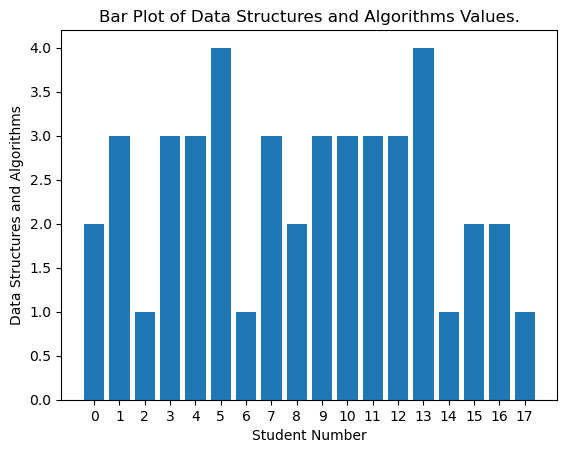

In [8]:
# Get the column to plot
column_to_plot = 'Data Structures and Algorithms'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

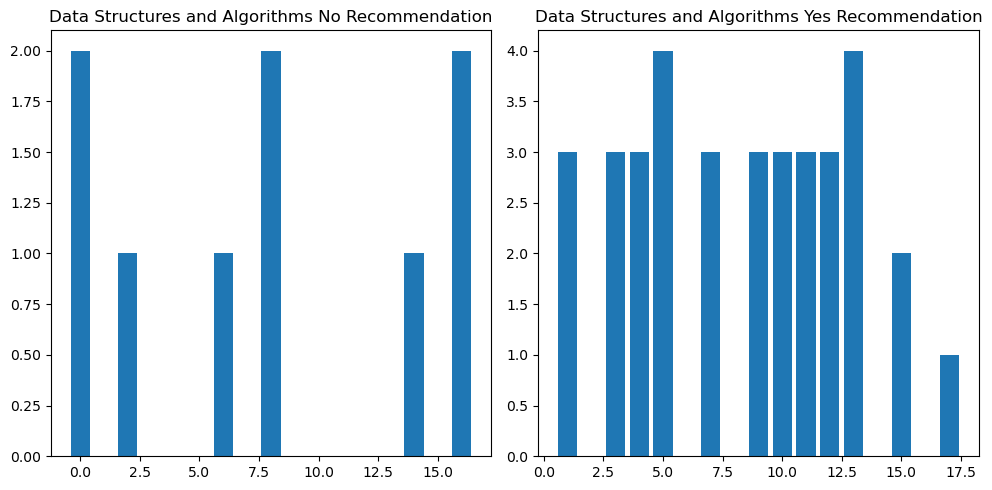

In [9]:
column_to_plot = 'Data Structures and Algorithms'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

It seems like the vast majority of the students with a Yes recommendation had a Data Structures and Algorithms score higher than a 3.

### Coding

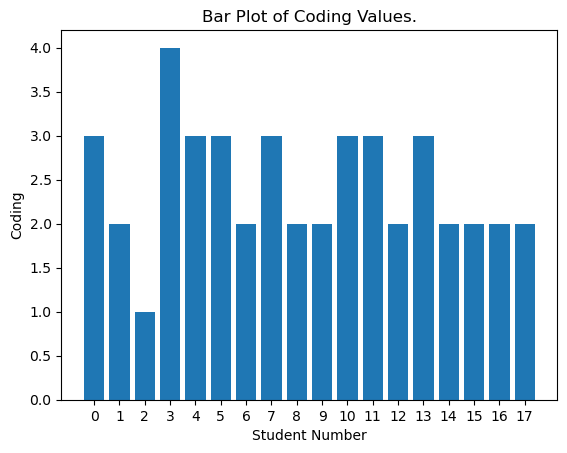

In [10]:
# Get the column to plot
column_to_plot = 'Coding'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

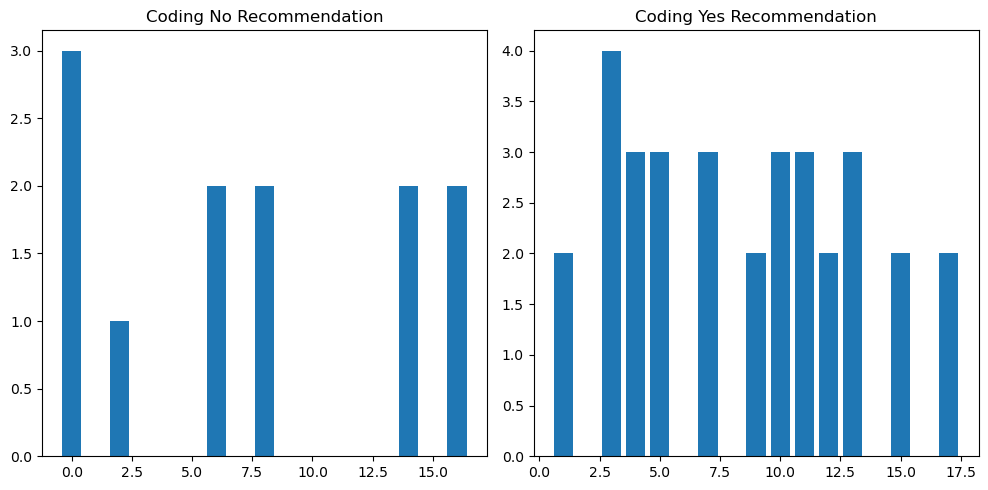

In [11]:
column_to_plot = 'Coding'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

Its hard to find an obvious pattern for the coding variable, but it seems like getting a 3 in this category almost always gets a yes, but getting a 2 does not necessarily disqualify you from getting a yes recommendation

### Structured Problem Solving

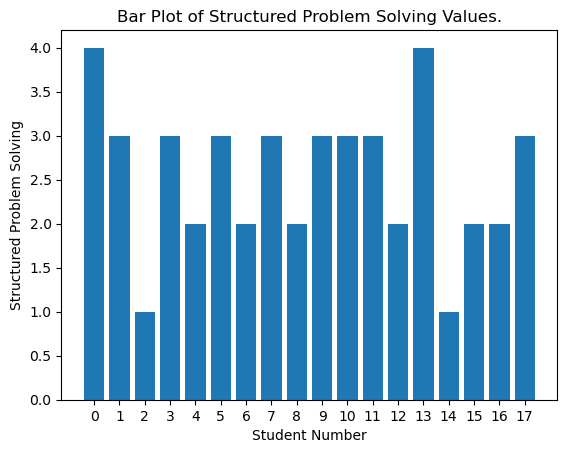

In [12]:
# Get the column to plot
column_to_plot = 'Structured Problem Solving'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

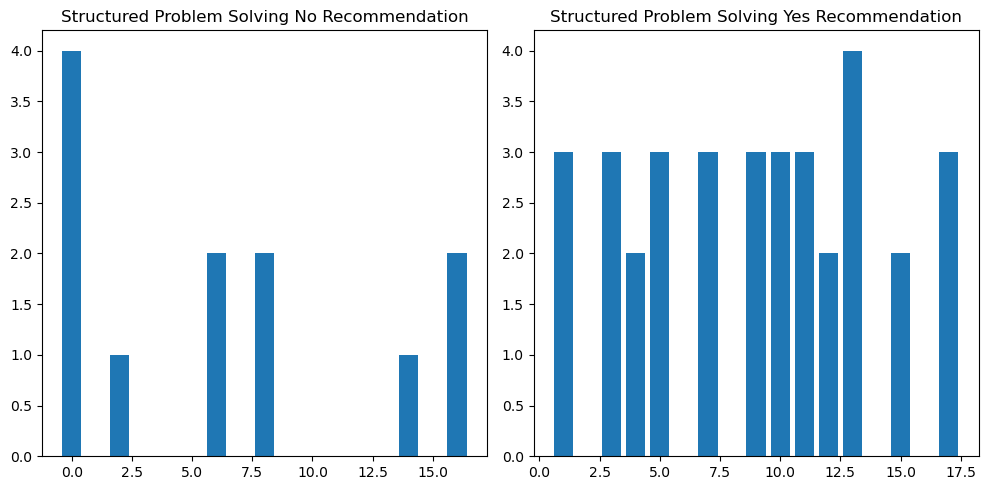

In [13]:
column_to_plot = 'Structured Problem Solving'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

This column is also very strange. It seems like getting a 3 or above will almost always give you a 'yes' recommendation, but with one outlier, where a student with a 4 got a no recommendation.

### Communication

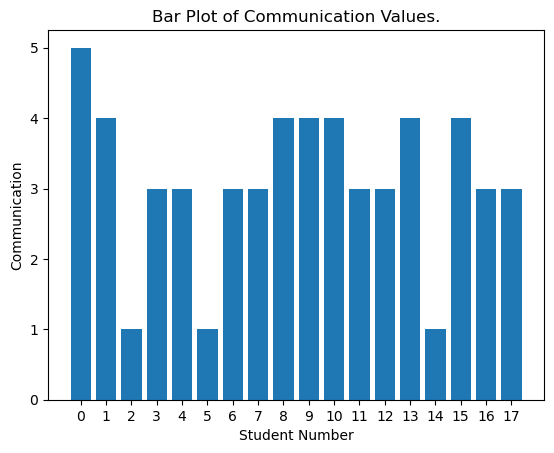

In [14]:
# Get the column to plot
column_to_plot = 'Communication'

# Create a bar plot of the column
plt.bar(df.index, df[column_to_plot])
plt.xticks(df.index)
plt.xlabel('Student Number')
plt.ylabel(column_to_plot)
plt.title('Bar Plot of ' + column_to_plot + ' Values.')
plt.show()

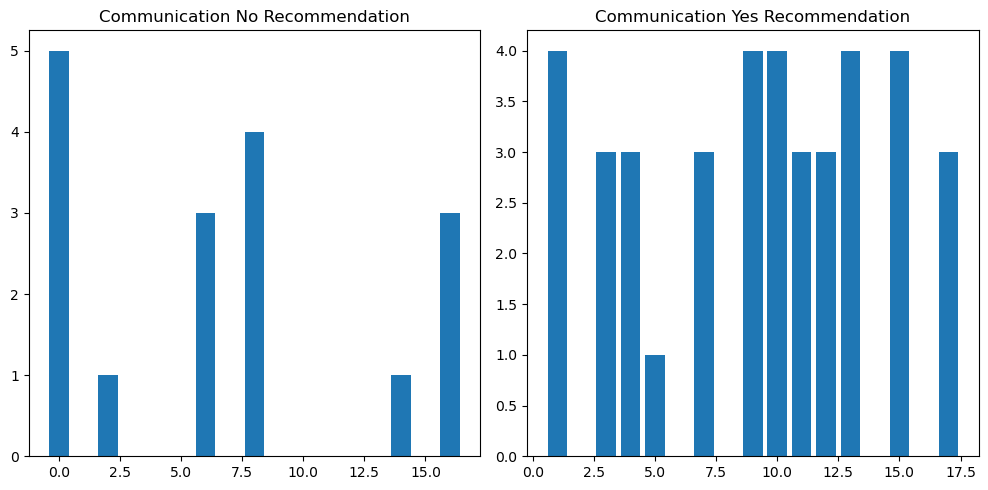

In [15]:
column_to_plot = 'Communication'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first bar plot
ax1.bar(df_no.index, df_no[column_to_plot], label='No Recommendation')
ax1.set_title(column_to_plot + ' No Recommendation')

# Plot the second bar plot
ax2.bar(df_yes.index, df_yes[column_to_plot], label='Yes Recommendation')
ax2.set_title(column_to_plot + ' Yes Recommendation')

# Show the plots
plt.tight_layout()
plt.show()

There doesn't seem to be any interesting trends that come from communication. It might not be the most ueseful predictor alone. Anywayyy time to run some ML models!

## Linear Regression

Why run a linear regression on an output with only 2 values? Because I'm bored and want to see how terrible it will be

In [16]:
_x = ['Data Structures and Algorithms','Coding','Structured Problem Solving','Communication']
_y = ['Recommendation']

In [17]:
linear_model = LinearRegression()
linear_model.fit(df[_x], df['Recommendation'])

LinearRegression()

In [18]:
y_pred = linear_model.predict(df[_x])
print(y_pred)

[0.58841772 0.86689873 0.14544304 0.85718354 0.80563291 1.20759494
 0.17629747 0.86721519 0.48563291 0.86689873 0.85686709 0.86721519
 0.81566456 1.23813291 0.13541139 0.48563291 0.49598101 0.23787975]


Okay so the accuracy is close to zero, but lets see which variables it thinks are the most important and how much weight it placed on each one.

In [19]:
# Print the coefficients
print(linear_model.coef_)
print(linear_model.intercept_)

[ 0.31968354 -0.01003165  0.06158228 -0.0103481 ]
-0.21544303797468356


### Assesment of Linear Regression


Okay, so according to the linear regression, "Data Structures and Algorithms" is by far the most important predictor, followed by "Structured Problem Solving". However, the accuracy was close to zero. Now lets try a logisitic regression

## Logistic Regression

From this point, we need to not just calculate the accuracy score but also the F1 score since we are doing binary classification of our data. The F1 score is a metric commonly used in machine learning and statistics to assess the performance of a binary classification model. It considers both the precision and recall of the model's predictions and provides a single value that balances these two metrics. The F1 score is especially useful when dealing with imbalanced datasets or when the cost of false positives and false negatives is different.

The F1 score is calculated using the following formula:

$F1 = \frac{2 \cdot precision \cdot recall}{precision + recall}$

Where
 - Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is a measure of how many of the predicted positive instances were actually positive.
- Recall (also known as sensitivity or true positive rate) is the ratio of correctly predicted positive observations to the all observations in the actual class. It is a measure of how many of the actual positive instances were correctly predicted as positive.

The F1 score ranges between 0 and 1, with higher values indicating better model performance. An F1 score of 1 indicates perfect precision and recall, while an F1 score of 0 indicates poor performance.

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(df[_x], df['Recommendation'])

LogisticRegression()

In [21]:
y_pred = logistic_model.predict(df[_x])
print(y_pred)

[1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0]


In [22]:
accuracy = accuracy_score(df['Recommendation'], y_pred)
f1 = f1_score(df['Recommendation'], y_pred, average='binary')

print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy: .2f}")

F1 Score: 0.83
Accuracy:  0.78


In [23]:
feature_importances = logistic_model.coef_
print("Feature Importances:")
print(feature_importances)

Feature Importances:
[[ 1.24185686  0.23030317  0.47473494 -0.17194097]]


### Assesment of Logistic Regression

Okay, so it looks like a basic logistic regression preforms very well, with an accuracy of 78% and an excellent F1 score of 0.83.  When we look at the feature importance, we find that "Data Structures and Algorithms" is by far the most important predictor, followed by "Structured Problem Solving" and then "Coding". Interestingly enough, it seems like communication has a slightly negative effect, which could possibly be due to the fact that the company weights down communication so it isnt a deciding factor compared to other skills.

## Adaboosting

Now its time to get a little strange. We will use a model called AdaBoost, short for Adaptive Boosting, which is a machine learning algorithm that belongs to the ensemble learning category. Ensemble learning involves combining the predictions of multiple models (base learners) to create a stronger and more accurate predictive model. AdaBoost, in particular, focuses on improving the performance of weak learners by iteratively adjusting their weights and combining their outputs. Our weak learner will of course be a logistic regression, and lets see if it improves the logistic regression at all

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
base_estimator = LogisticRegression()
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

In [26]:
adaboost_model.fit(df[_x], df['Recommendation'])

AdaBoostClassifier(estimator=LogisticRegression(), random_state=42)

In [27]:
y_pred = adaboost_model.predict(df[_x])
print(y_pred)

[1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0]


In [28]:
accuracy = accuracy_score(df['Recommendation'], y_pred)
f1 = f1_score(df['Recommendation'], y_pred, average='binary')

print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy: .2f}")

F1 Score: 0.83
Accuracy:  0.78


### Analysis of Adaboost Preformance

Okay, so it looks like we did not see any improvements at all in the preformance of the model after adaboosting.

When a base learner (in this case, our previous logistic regression) performs very well on the training data, it means that it's already capturing the underlying patterns and relationships present in the data quite accurately. In such a scenario, the base learner is not a weak learner, which is a key assumption of the AdaBoost algorithm. AdaBoost works by iteratively giving more emphasis to the misclassified instances in each round, essentially focusing on the "difficult" examples that the weak learner struggles with. However, since out base model already preformed incredibly well, there is no point in adaboosting.

## Decision Tree

A Decision Tree is a fundamental machine learning algorithm used for both classification and regression tasks. It's a flowchart-like tree structure where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents a class(either 1 or 0)

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(df[_x], df['Recommendation'])

DecisionTreeClassifier(random_state=42)

In [32]:
y_pred = dt_model.predict(df[_x])
print(y_pred)

[0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1]


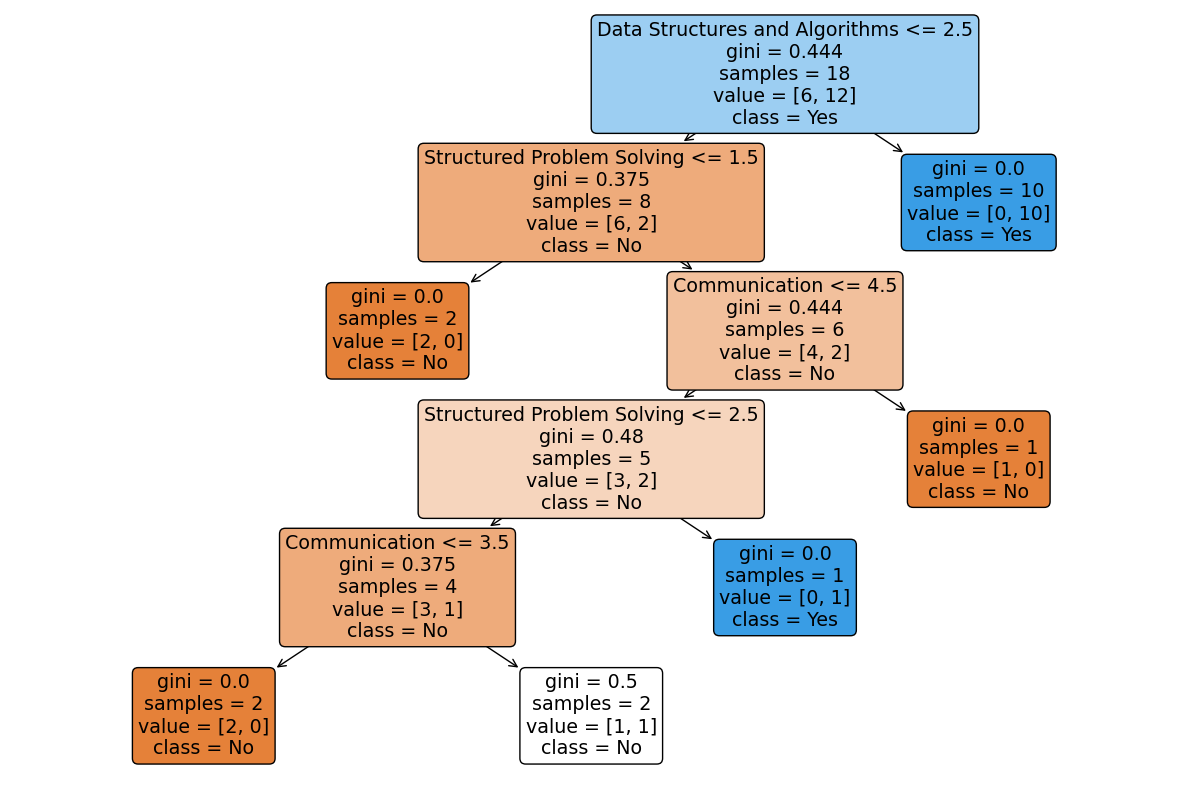

In [40]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=_x, class_names=["No","Yes"], filled=True, rounded=True)
plt.show()

In [33]:
accuracy = accuracy_score(df['Recommendation'], y_pred)
f1 = f1_score(df['Recommendation'], y_pred, average='binary')

print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy: .2f}")

F1 Score: 0.96
Accuracy:  0.94


### Analysis of Decision Tree

The decision tree did incredibly well with an accuracy of 94% and an F1 score of 0.96. It seems like the first and most important classifier is "Data Structures and Algorithms", where every value greater than 2.5 gets automatically classified as a "Yes" Recommendation. Next the tree checks "Structured Problem Solving", and any value less than or equal to 1.5 gets classifed as a "No". Remaining values are then checked against Communication, and any value larger than a 4.5 gets classified as a "No".(This is probably because of the one outlier student that was given a No recommendation with a score of 5) The next set of values are once again checked against "Structured Problem Solving" and any values larger than 2.5 are given a "Yes" and the rest are given a "No"